3.1:

Write a function for Python that simulates the roll of two standard, six-sided dice. Have the program roll the dice a large number of times and report the fraction of rolls that are each possible combination, 2–12. Compare your numbers with the probability of each possible roll that you calculate by hand.

In [6]:
import random

def roll(rolls):
    results = [0] * 11

    for _ in range(rolls): #_ is used  due to index not being necessary (no i)
        total = random.randint(1,6) + random.randint(1,6) # Roll 2 dice and add total sum
        results[total - 2] += 1 #Adjust index
        
    frac = [result / rolls for result in results] #Convert counts to probabilities
    return frac

def hand():
    hand_calc = [
        1/36, 2/36, 3/36, 4/36, 5/36, 6/36, 5/36, 4/36, 3/36, 2/36, 1/36 
    ]

    
    sim_ = roll(100000)

    print("Total\tSim\tHand")

    for total in range(2,13):
        sim = sim_[total - 2]
        hand = hand_calc[total - 2]
        print(f"{total}\t{sim:.4f}\t{hand:.4f}")

hand()

Total	Sim	Hand
2	0.0280	0.0278
3	0.0557	0.0556
4	0.0826	0.0833
5	0.1127	0.1111
6	0.1376	0.1389
7	0.1665	0.1667
8	0.1381	0.1389
9	0.1113	0.1111
10	0.0850	0.0833
11	0.0545	0.0556
12	0.0279	0.0278


3.2:

What is the value of x at the end of the following code snippet:

def sillyFunction(input_var):
    x = 1.0
    return input_var
    
x = 10.0
sillyFunction(x)

Asnwer to 3.2:

The output value would be 10 because the value of x is assigned outside of the function. When sillyFunction(x) is called it returns input_var which is defined as x.

3.3: 

Write a function that takes as a parameter the name of the file, and a parameter that gives the number of lines to read from the file. The function should open the file, read the lines and print them to the screen, and then close the file.

In [10]:
def name_lines(name, lines): #define a function
    try:
        with open(name, 'r') as file:
            for _ in range(int(lines)): #attempt to read and print the number of lines
                line = file.readline().strip() #read lines and strip of whitespace
                if not line: #check if line is empty
                    print ("Reached the end of the file before reading the requested number of lines")
                    break
                print(line)
    except FileNotFoundError: #ensure valid file name
        print(f'File {name} not found')
    except ValueError: #ensure valid input for lines
        print("Please enter a valid number for lines")

name = input("Please enter the name of the file that you wish to open \n")
lines = input("Pleae enter the number of lines that you wish to read")

name_lines(name, lines)

Please enter the name of the file that you wish to open 
 adf
Pleae enter the number of lines that you wish to read 123


File adf not found


4.2:

Ask the user for a matrix size, N. Print to the user a random matrix of size N by N. Then print to the user the vector that contains the sum of each column.

In [12]:
import numpy as np

N = int(input("Please enter the size of your matrix N:")) #ask for dimensions of matrix
    
random_matrix = np.random.random((N,N)) #create random matrix of N by N

print(f"Random {N} by {N} matrix:") #print matrix
print(random_matrix)

sums = np.sum(random_matrix, axis = 0) #sum each collumn

print("Vector sum of each collumn:") #print vector sum of each collumn
print(sums)

Please enter the size of your matrix N: 7


Random 7 by 7 matrix:
[[0.64294961 0.85823426 0.37894361 0.43174904 0.9277904  0.94638015
  0.26372524]
 [0.12935812 0.43635484 0.38486434 0.93254218 0.73624967 0.16076836
  0.58470376]
 [0.78788757 0.48217763 0.36239351 0.56728468 0.06257291 0.11701823
  0.10581289]
 [0.40978294 0.28889578 0.15794264 0.10051515 0.43985348 0.00948457
  0.06201239]
 [0.40334847 0.83290622 0.9219755  0.45842063 0.18495937 0.50391992
  0.41570131]
 [0.33296534 0.95818992 0.0519707  0.33869749 0.55463591 0.36098233
  0.74864579]
 [0.33635658 0.26880957 0.94775939 0.13308518 0.15808488 0.25408726
  0.58845413]]
Vector sum of each collumn:
[3.04264863 4.12556823 3.20584969 2.96229436 3.06414662 2.3526408
 2.7690555 ]


4.5:

Ask the user for a vector size, N. Print to the user a random vector of size N where the elements of N are from a normal distribution with mean 0 and standard deviation 1. To generate this vector you should use np.random.normal. Then print the mean value of the vector and the standard deviation. NumPy has a function that returns the mean value and standard deviation: x.mean() and x.std(), where x is the name of a vector.

In [14]:
import numpy as np

N = int(input("Please enter the size of your vector N:")) #get user input of size of vector

random_vector = np.random.normal(loc = 0, scale = 1, size = N) #create a randomized vector with size N

mean = random_vector.mean() #calculate mean
std = random_vector.std() #calculate standard deviation

print(random_vector)
print("Mean of the vector is:")
print(mean)
print("Standard deviation of the vector is:")
print(std)

Please enter the size of your vector N: 7


[-0.91363422  0.22502413 -0.31061712 -0.50529264  0.51761426 -0.15861272
  0.41495492]
Mean of the vector is:
-0.10436619736682647
Standard deviation of the vector is:
0.48198858559170843


4.6:

Ask the user for a vector size, N. Print to the user two random vectors of size N; call these vectors x and y. If we consider these vectors being the coordinates of points (xi , y i ), compute the matrix r that contains the distances between each point and each of other points. This matrix will have elements
$$
r_{ij} = \sqrt{(x_i - x_j)^2 + (y_1 - y_j)^2}
$$
The diagonal of this matrix should be all zeros.

In [16]:
N = int(input("Please enter the size of vectors x and y:"))

x = np.random.normal(loc = 0, scale = 1, size = N)
y = np.random.normal(loc = 0, scale = 1, size = N)

r = np.zeros ((N,N))

for i in range(N):
    for j in range(N):
        r[i,j] = np.sqrt((x[i] - x[j]) ** 2 + (y[i] - y[j]) ** 2)

print("\nVector x:")
print(x)
print("\nVector y:")
print(y)
print("\nThe distance matrix of vectors x and y is:\n")
print(r)

Please enter the size of vectors x and y: 7



Vector x:
[ 0.97491578  1.03603939 -0.70482695  0.34034283  0.10170851 -1.50653429
  0.12119465]

Vector y:
[ 0.24363856  0.14347128 -1.51988657  0.30202329  0.09197802  1.10157202
  0.85983828]

The distance matrix of vectors x and y is:

[[0.         0.11734385 2.43547871 0.63725318 0.88627979 2.62557504
  1.05287315]
 [0.11734385 0.         2.40777386 0.71353518 0.93574876 2.71710102
  1.16194775]
 [2.43547871 2.40777386 0.         2.10041316 1.80238922 2.74130988
  2.51900815]
 [0.63725318 0.71353518 2.10041316 0.         0.31790778 2.01251913
  0.59931918]
 [0.88627979 0.93574876 1.80238922 0.31790778 0.         1.89887466
  0.76810747]
 [2.62557504 2.71710102 2.74130988 2.01251913 1.89887466 0.
  1.64558096]
 [1.05287315 1.16194775 2.51900815 0.59931918 0.76810747 1.64558096
  0.        ]]


CH 4 Programming Project 1: Inhour Equations

The inhour equation (short for inverse hour) describes the growth or decay of the neutron
population in a reactor as described by the point kinetics equations. The equation relates the
reactivity, ρ, the mean generation time, Λ, the fraction of fission neutrons born from each of
six delayed neutron precursor groups, βi , and the decay constant for those groups, λ i . The
inhour equation is
$$
ρ = s(Λ + \sum_{i=1}^{6} \frac{β_i}{s+λ_i})
$$
The seven values of s that satisfy this equation are used to express the neutron population as
function of time, n(t), as
$$
n(t) = \sum_{l=1}^{7} A_le^{s_lt}
$$
The decay constant of a delayed neutron precursor group is related to the half-life for neutron
emission by the group is
$$
λ_i = \frac{\ln{2}}{t_{\frac{1}{2}}}
$$
Common values of the necessary constants in this equation are [7]: Λ = 5 × 10−5 s
β = {0.00021, 0.00142, 0.00128, 0.00257, 0.00075, 0.00027},
where the total delayed fraction  ̄β = 0.0065, and
t1/2 = {56, 23, 6.2, 2.3, 0.61, 0.23} s.
Using this data, plot the right-hand side of the inhour equation as a function of s, and plot
a horizontal line corresponding to ρ to graphically illustrate the roots of the inhour equation.
Do this for ρ = −1, 0, 0.1  ̄β,  ̄β, and discuss the results. Make sure that the scale of your plot
makes sense given that there will be singularities in the plot.

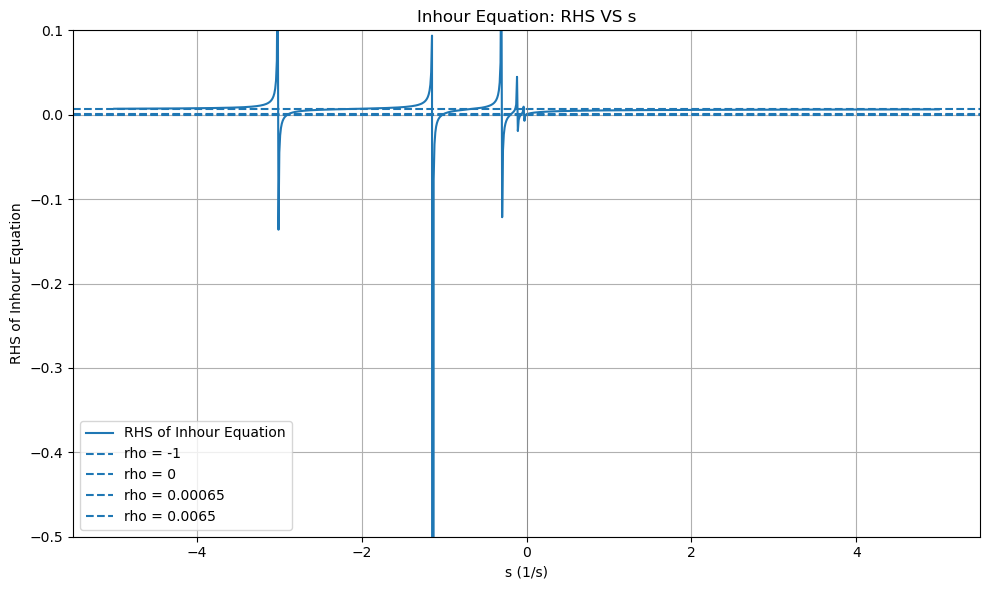

In [22]:
import numpy as np
import matplotlib.pyplot as plt

#constants

Lambda = 5e-5 #mean generation time
beta_tot = 0.0065
t_half  = np.array([56,23,6.2,2.3,0.61,0.23]) #seconds
beta_i = np.array([0.00021,0.00142,0.00128, 0.00257, 0.00075, 0.00027])

#decay constants
lambda_i = np.log(2) / t_half

#generate array for values of s
s_values = np.linspace(-5, 5, 1000)

#avoid division by zero
epsilon = 1e-10
s_values = s_values[~np.isin(np.round(s_values, 10), np.round(-lambda_i, 10))]

#compute sum
sum_term = np.zeros_like(s_values)
for i in range(6):
    sum_term += beta_i[i] / (s_values + lambda_i[i]) #would using np.sum work here? I tried it a few different ways and couldn't figure it out.

#RHS of inhour equation
rho_rhs = s_values * (Lambda + sum_term)

#plot
plt.figure(figsize = (10,6))
plt.plot(s_values, rho_rhs, label = 'RHS of Inhour Equation')

#plot for different rho values
rho_vals = [-1,0,0.1*beta_tot,beta_tot]
for r in rho_vals:
    plt.axhline(y=r, linestyle = '--', label = f'rho = {r}')

plt.title("Inhour Equation: RHS VS s")
plt.grid(True)
plt.xlabel("s (1/s)")
plt.ylabel("RHS of Inhour Equation")
plt.legend()
plt.ylim(-0.5,0.1)
plt.axvline(x=0, color = 'gray', linewidth = 0.5)
plt.tight_layout()
plt.show()